In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set visualization style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('financial_risk_assessment.csv')


df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [3]:
df.describe(include=[np.number])

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


In [4]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Income,2250
Credit Score,2250
Loan Amount,2250
Loan Purpose,0
Employment Status,0
Years at Current Job,0


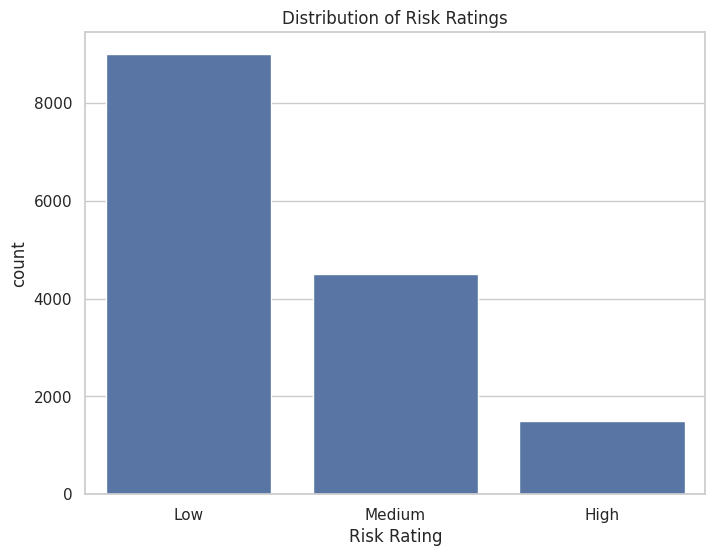

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x='Risk Rating', data=df)
plt.title('Distribution of Risk Ratings')
plt.show()

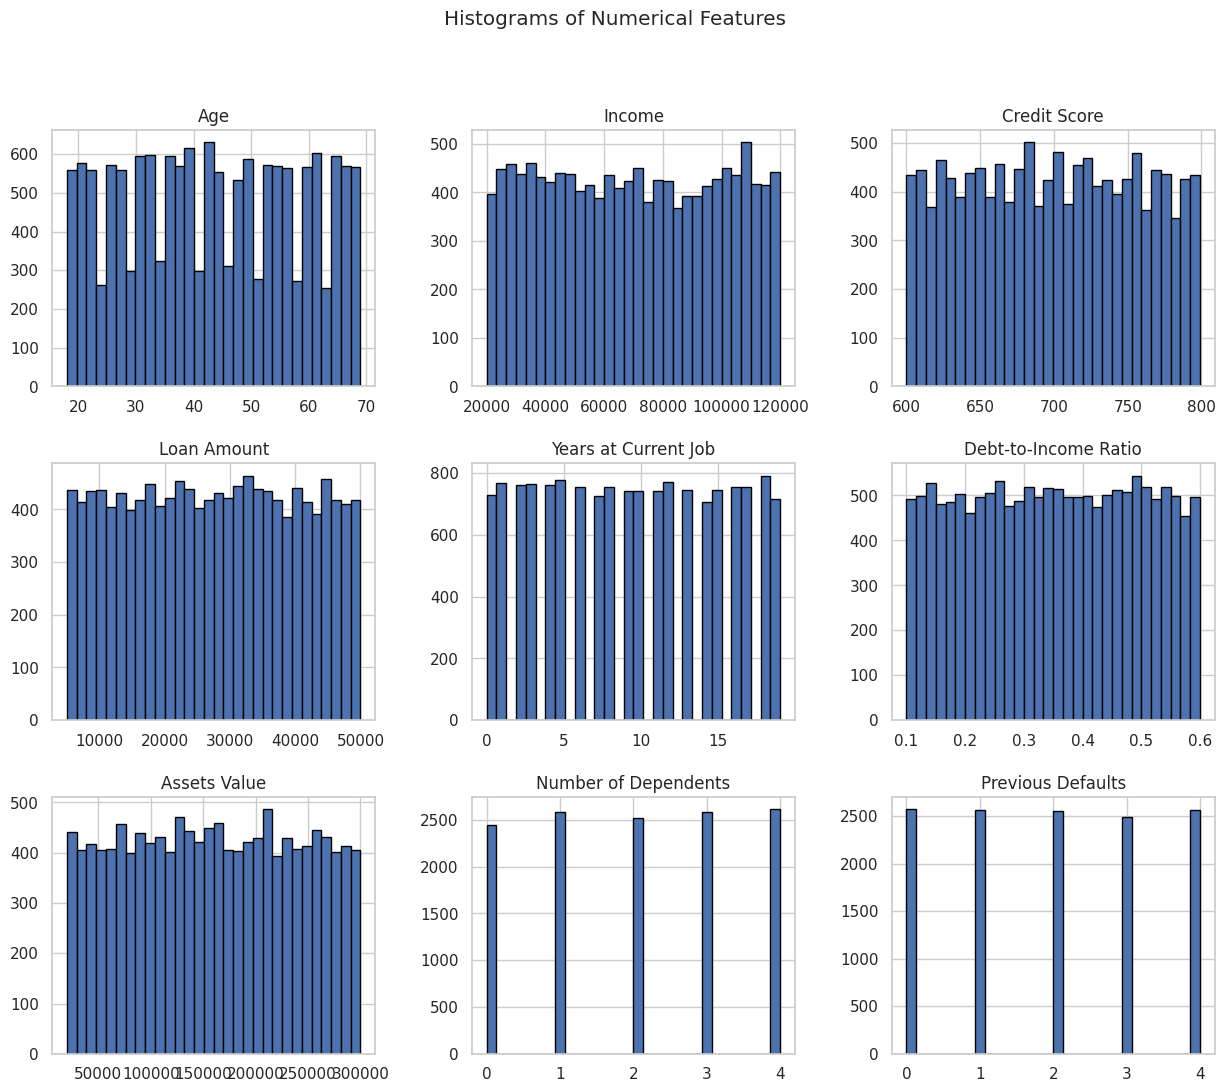

In [7]:
num_features = ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
                 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults']
df[num_features].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

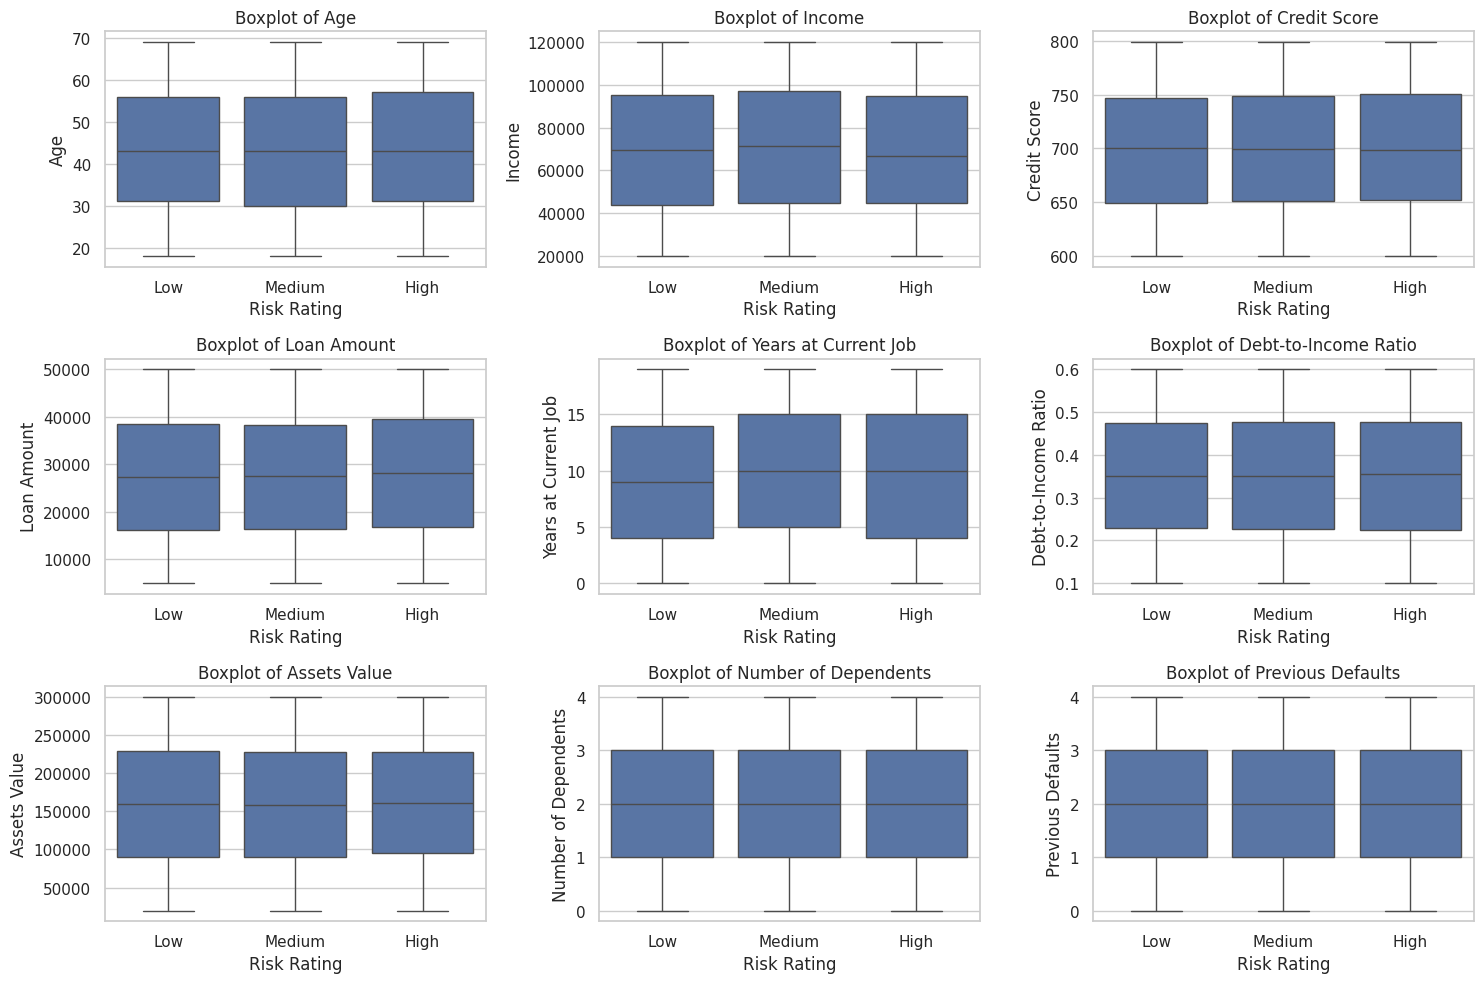

In [8]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Risk Rating', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

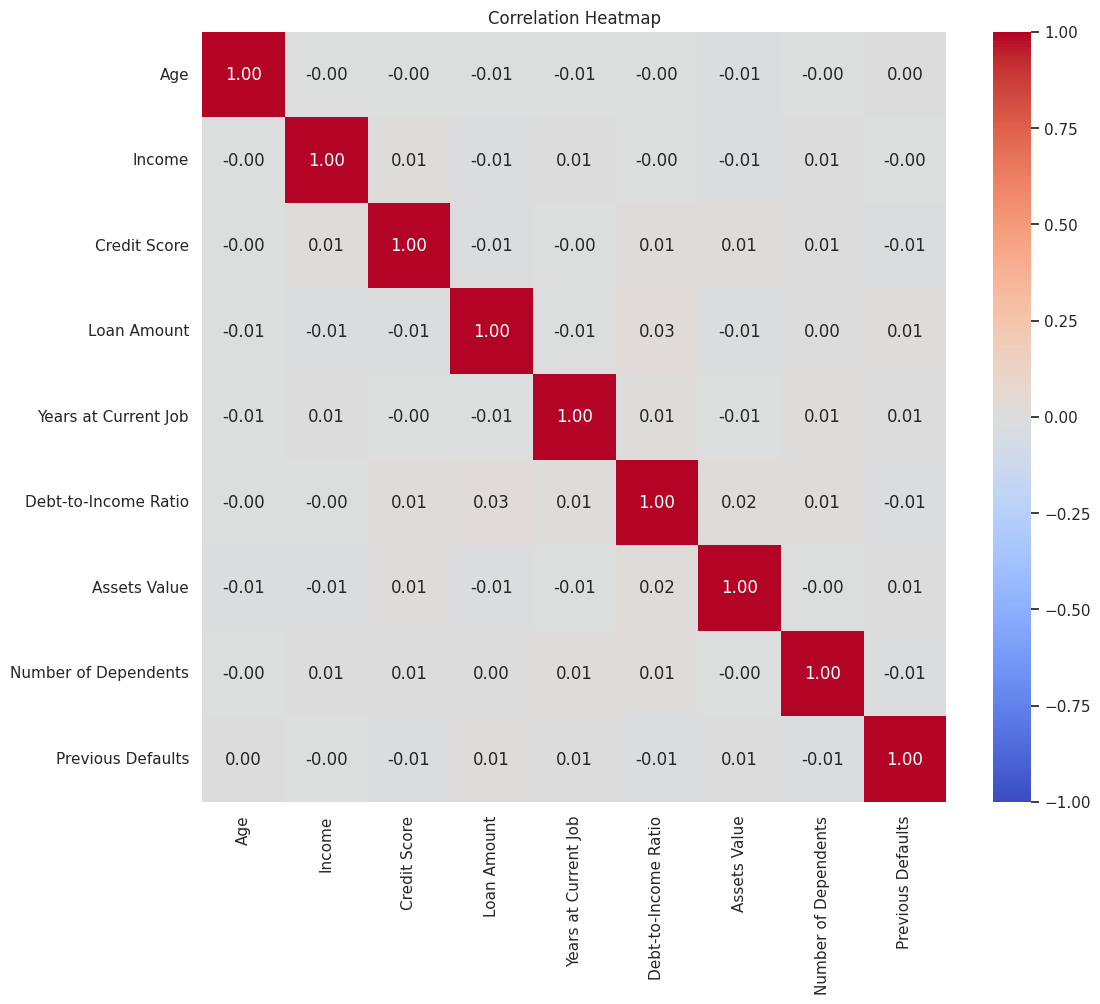

In [9]:
plt.figure(figsize=(12,10))
correlation_matrix = df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the data
X = df[['Age', 'Income', 'Credit Score', 'Loan Amount', 'Gender', 'Education Level', 'Loan Purpose']]
y = df['Risk Rating']

# Encoding categorical features
labelencoder = LabelEncoder()

# Apply label encoding on categorical columns
X['Gender'] = labelencoder.fit_transform(X['Gender'])
X['Education Level'] = labelencoder.fit_transform(X['Education Level'])
X['Loan Purpose'] = labelencoder.fit_transform(X['Loan Purpose'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier with class_weight to handle imbalance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the accuracy
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


<ipython-input-15-ad6cc347c540>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = labelencoder.fit_transform(X['Gender'])
<ipython-input-15-ad6cc347c540>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Education Level'] = labelencoder.fit_transform(X['Education Level'])
<ipython-input-15-ad6cc347c540>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Confusion Matrix:
[[   0  442   28]
 [   2 2561  129]
 [   3 1276   59]]

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       470
         Low       0.60      0.95      0.73      2692
      Medium       0.27      0.04      0.08      1338

    accuracy                           0.58      4500
   macro avg       0.29      0.33      0.27      4500
weighted avg       0.44      0.58      0.46      4500

Accuracy: 58.22%


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data
X = df[['Age', 'Income', 'Credit Score', 'Loan Amount', 'Gender', 'Education Level', 'Loan Purpose']]
y = df['Risk Rating']

# Encoding categorical features
labelencoder = LabelEncoder()
X['Gender'] = labelencoder.fit_transform(X['Gender'])
X['Education Level'] = labelencoder.fit_transform(X['Education Level'])
X['Loan Purpose'] = labelencoder.fit_transform(X['Loan Purpose'])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can change strategy to 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with resampled data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the accuracy
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


<ipython-input-17-01e58e20e0e6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = labelencoder.fit_transform(X['Gender'])
<ipython-input-17-01e58e20e0e6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Education Level'] = labelencoder.fit_transform(X['Education Level'])
<ipython-input-17-01e58e20e0e6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Confusion Matrix:
[[   1  411   58]
 [  18 2329  345]
 [  14 1172  152]]

Classification Report:
              precision    recall  f1-score   support

        High       0.03      0.00      0.00       470
         Low       0.60      0.87      0.71      2692
      Medium       0.27      0.11      0.16      1338

    accuracy                           0.55      4500
   macro avg       0.30      0.33      0.29      4500
weighted avg       0.44      0.55      0.47      4500

Accuracy: 55.16%


In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame containing the data
X = df[['Age', 'Income', 'Credit Score', 'Loan Amount', 'Gender', 'Education Level', 'Loan Purpose']]
y = df['Risk Rating']

# Encoding categorical features for X
labelencoder = LabelEncoder()
X['Gender'] = labelencoder.fit_transform(X['Gender'])
X['Education Level'] = labelencoder.fit_transform(X['Education Level'])
X['Loan Purpose'] = labelencoder.fit_transform(X['Loan Purpose'])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
X_imputed = imputer.fit_transform(X)

# Encoding target labels (y) into numeric values
labelencoder_y = LabelEncoder()
y_encoded = labelencoder_y.fit_transform(y)

# Now, y_encoded contains numeric values instead of 'High', 'Low', 'Medium'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.3, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create an XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, scale_pos_weight=3, random_state=42)

# Train the model with resampled data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the accuracy
accuracy = xgb_model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# If you want to decode the predictions back to the original 'High', 'Low', 'Medium' labels:
y_pred_original = labelencoder_y.inverse_transform(y_pred)


<ipython-input-19-d38db5256ce5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = labelencoder.fit_transform(X['Gender'])
<ipython-input-19-d38db5256ce5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Education Level'] = labelencoder.fit_transform(X['Education Level'])
<ipython-input-19-d38db5256ce5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Confusion Matrix:
[[   9  407   54]
 [  32 2272  388]
 [  12 1126  200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.02      0.03       470
           1       0.60      0.84      0.70      2692
           2       0.31      0.15      0.20      1338

    accuracy                           0.55      4500
   macro avg       0.36      0.34      0.31      4500
weighted avg       0.47      0.55      0.48      4500

Accuracy: 55.13%
